In [1]:
import ipywidgets as ipw
import numpy as np
import pylab as pl
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[0.45688718 0.29592342] 5.919680457501944
[0.05857556 0.81463042] [2.4485345  3.38335474]
[0.6067709  0.76461024] [1.89484992 4.11927592]
[0.59095342 0.07737632] [1.02282956 2.82998965]
(2, 50)


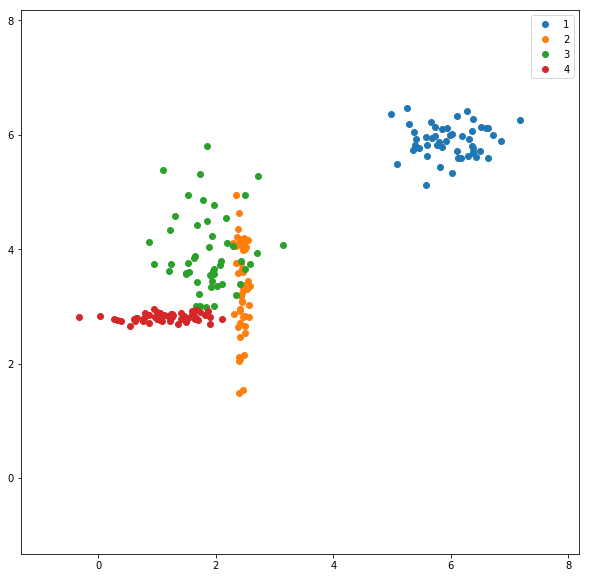

In [7]:
np.random.seed(1789)

pl.figure(figsize = (10,10))

k1s, k1m = np.random.rand(2), random.rand()*10
print (k1s, k1m)
k1 = (k1s*np.random.randn(50,2)+k1m).T
k2s, k2m = np.random.rand(2), random.rand(2)*5
print (k2s, k2m)
k2 = (k2s*np.random.randn(50,2)+k2m).T
k3s, k3m = np.random.rand(2), random.rand(2)*5
print (k3s, k3m)
k3 = (k3s*np.random.randn(50,2)+k3m).T
k4s, k4m = np.random.rand(2), random.rand(2)*3
print (k4s, k4m)
k4 = (k4s*np.random.randn(50,2)+k4m).T
pl.plot(k1[0], k1[1], 'o', label='1')
pl.plot(k2[0], k2[1], 'o', label='2')
pl.plot(k3[0], k3[1], 'o', label='3')
pl.plot(k4[0], k4[1], 'o', label='4')
kall = np.concatenate([k1.T, k2.T, k3.T, k4.T])
lims = (min(min(kall[:,0]), min(kall[:,0]))-1, max(max(kall[:,0]), max(kall[:,1]))+1)
pl.xlim(lims)
pl.ylim(lims)
pl.legend()
print (k1.shape)

In [8]:
vs = {}
labels={}
nclusters = range(1,26) #[1,2,3,4,5,6,8,10,13,18,25]#,32,64]
for j,n_c in enumerate(nclusters):
    clf = sklearn.cluster.KMeans(n_clusters=n_c)
    labels[n_c] = clf.fit_predict(kall) #.reshape(100,2)
    vs[n_c] = (np.sum([np.std(np.array(
        [kall[:,0][labels[n_c]==l], kall[:,1][labels[n_c]==l]]).T - clf.cluster_centers_[l]) \
                      for l in labels[n_c]]))

In [9]:
def plotclusters(n_c):    
    pl.figure(figsize=(16,10))
    ax = pl.subplot(122)
    
    for l in labels[n_c]:
        if l in labels[n_c]:
            pl.plot(kall.T[0][labels[n_c]==l], kall.T[1][labels[n_c]==l], '.',
                       c=pl.cm.plasma.colors[\
                            (l*len(pl.cm.plasma.colors))//n_c], alpha=0.7, ms=10)
    
    ax.yaxis.tick_right()
    
    pl.axis('equal')
    #pl.axis([lims[0], lims[1], lims[0], lims[1]])
    pl.xlim(lims)
    pl.ylim(lims)
    ax2 = ax.twinx()
    ax2.set_ylabel('y', fontsize=20)
    pl.grid('off')
    pl.xlabel('x', fontsize=20)
    pl.title ("%d K-means clusters"%n_c)

    ax1 = pl.subplot(121)
    pl.ylabel("sum of inter-cluster vairances", fontsize=20)
    pl.xlabel("N clusters", fontsize=20)
    pl.plot(vs.keys(), vs.values(), 'o')
    pl.plot(vs.keys(), vs.values(), '-')
    pl.plot(n_c, list(vs.values())[n_c-1], 'rX', ms=14)

    pl.xlim(1,max(nclusters))
    pl.ylim(0,350)
    

In [10]:
@ipw.interact(nclusters=8)
def showclusters(nclusters=2):
    if nclusters > 0:
        plotclusters(nclusters)

interactive(children=(IntSlider(value=8, description='nclusters', max=24, min=-8), Output()), _dom_classes=('w…

In [7]:
a = pl.cm.viridis
a.colors[256]

IndexError: list index out of range

In [ ]:
list(vs.keys())[0]

In [26]:
vs

{1: 325.54772151335453,
 2: 126.45958001782613,
 3: 98.48685660144936,
 4: 82.23139934302861,
 5: 73.52553096038514,
 6: 66.49094135643563,
 7: 60.74002696833381,
 8: 54.78880819579213,
 9: 49.96642594947662,
 10: 48.306191867119665,
 11: 44.43291299134611,
 12: 42.38952198807966,
 13: 41.31545161155368,
 14: 38.49070200482068,
 15: 36.96009711122045,
 16: 35.754478417401685,
 17: 33.998611406046635,
 18: 32.910349346442665,
 19: 32.156865740327895,
 20: 31.701253066407848,
 21: 30.05229531052616,
 22: 27.999849464242892,
 23: 27.445845064377295,
 24: 27.102886085020188,
 25: 25.94225176563503}